In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np

In [2]:
all_train_probs = pd.read_csv("c:/Users/Rachel/Documents/Grad_Stuff/Dissertation/results/final_probs_3deg.csv")

In [4]:
all_train_probs

,English: WH,English: Y/N,Mandarin: WH,Mandarin: Y/N,id,language,questions
0,4.935246e-07,4.248855e-07,3.790100e-07,2.960132e-07,0,English,WH
1,4.584544e-07,5.524792e-07,4.899636e-07,5.276567e-07,1,English,Y/N
2,4.943989e-07,6.406325e-07,6.839739e-07,1.023046e-06,2,English,WH
3,7.325135e-07,1.047435e-06,8.014092e-07,1.130194e-06,3,English,WH
4,9.143717e-07,1.220274e-06,1.076670e-06,1.832554e-06,4,English,WH
5,1.217968e-06,1.268114e-06,9.883747e-07,1.084021e-06,5,English,Y/N
6,1.233100e-06,1.111881e-06,1.049803e-06,1.163327e-06,6,English,Y/N
7,7.899918e-07,5.519436e-07,4.747720e-07,3.306757e-07,7,English,Y/N
8,1.001771e-06,1.416938e-06,1.078369e-06,1.809821e-06,8,English,Y/N
9,1.045649e-06,9.280304e-07,8.734022e-07,9.569104e-07,9,English,WH


In [3]:
all_train_data = pd.read_csv("c:/Users/Rachel/Documents/Grad_Stuff/Dissertation/degree3_train_norm_meanstd_legens.csv")

In [14]:
all_train_data

,Unnamed: 0,file,ID,language,start,questions,means,stds,f0final,legen_coefs
0,0,p254p255-part1_ch2,255,English,5.889176,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -0....","[0.4388430287752368, -0.48455826443425853, -1...."
1,1,p254p255-part1_ch2,255,English,26.446841,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.4500430535993323, 0.47647529241271597, -0.4..."
2,2,p254p255-part1_ch2,255,English,30.233468,WH,88.891661,58.743472,"[0.20412887421808237, 0.27275777704594406, 0.3...","[-0.10337883280469173, -0.793930796883687, 0.2..."
3,3,p254p255-part1_ch2,255,English,48.636714,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.06987262342204603, 0.40040356082189654, 0...."
4,4,p254p255-part1_ch2,255,English,104.758627,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.21089670261937551, -0.4737557421398777, -0...."
5,5,p254p255-part1_ch2,255,English,118.306289,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.13401660966352277, 0.25877110895968375, -0..."
6,6,p254p255-part1_ch2,255,English,142.635380,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.1518519043292215, -0.5242963911182915, -0...."
7,7,p254p255-part1_ch2,255,English,152.205946,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.2924882523584111, -0.17550195714455066, -1..."
8,8,p254p255-part1_ch2,255,English,211.408755,Y/N,88.891661,58.743472,"[-1.5132177067301742, -0.08958052953474949, -0...","[0.20993341108827804, 0.06132486451460317, -0...."
9,9,p254p255-part1_ch2,255,English,284.433922,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.28721908553079384, 0.18532774117872916, -0..."


In [22]:
all_train_probs = all_train_probs.rename(index=float, columns={"English: WH": "EnglishWH", "English: Y/N":"EnglishYN","Mandarin: WH": "MandarinWH", "Mandarin: Y/N":'MandarinYN'})

In [23]:
prob_features = all_train_probs.drop(["id", "language","questions"], axis=1)

In [24]:
prob_features

,EnglishWH,EnglishYN,MandarinWH,MandarinYN
0.0,4.935246e-07,4.248855e-07,3.790100e-07,2.960132e-07
1.0,4.584544e-07,5.524792e-07,4.899636e-07,5.276567e-07
2.0,4.943989e-07,6.406325e-07,6.839739e-07,1.023046e-06
3.0,7.325135e-07,1.047435e-06,8.014092e-07,1.130194e-06
4.0,9.143717e-07,1.220274e-06,1.076670e-06,1.832554e-06
5.0,1.217968e-06,1.268114e-06,9.883747e-07,1.084021e-06
6.0,1.233100e-06,1.111881e-06,1.049803e-06,1.163327e-06
7.0,7.899918e-07,5.519436e-07,4.747720e-07,3.306757e-07
8.0,1.001771e-06,1.416938e-06,1.078369e-06,1.809821e-06
9.0,1.045649e-06,9.280304e-07,8.734022e-07,9.569104e-07


In [27]:
all_train_data = pd.concat([all_train_data, prob_features], axis=1)

In [28]:
all_train_data

,Unnamed: 0,file,ID,language,start,questions,means,stds,f0final,legen_coefs,EnglishWH,EnglishYN,MandarinWH,MandarinYN
0,0,p254p255-part1_ch2,255,English,5.889176,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -0....","[0.4388430287752368, -0.48455826443425853, -1....",4.935246e-07,4.248855e-07,3.790100e-07,2.960132e-07
1,1,p254p255-part1_ch2,255,English,26.446841,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.4500430535993323, 0.47647529241271597, -0.4...",4.584544e-07,5.524792e-07,4.899636e-07,5.276567e-07
2,2,p254p255-part1_ch2,255,English,30.233468,WH,88.891661,58.743472,"[0.20412887421808237, 0.27275777704594406, 0.3...","[-0.10337883280469173, -0.793930796883687, 0.2...",4.943989e-07,6.406325e-07,6.839739e-07,1.023046e-06
3,3,p254p255-part1_ch2,255,English,48.636714,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.06987262342204603, 0.40040356082189654, 0....",7.325135e-07,1.047435e-06,8.014092e-07,1.130194e-06
4,4,p254p255-part1_ch2,255,English,104.758627,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.21089670261937551, -0.4737557421398777, -0....",9.143717e-07,1.220274e-06,1.076670e-06,1.832554e-06
5,5,p254p255-part1_ch2,255,English,118.306289,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.13401660966352277, 0.25877110895968375, -0...",1.217968e-06,1.268114e-06,9.883747e-07,1.084021e-06
6,6,p254p255-part1_ch2,255,English,142.635380,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.1518519043292215, -0.5242963911182915, -0....",1.233100e-06,1.111881e-06,1.049803e-06,1.163327e-06
7,7,p254p255-part1_ch2,255,English,152.205946,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.2924882523584111, -0.17550195714455066, -1...",7.899918e-07,5.519436e-07,4.747720e-07,3.306757e-07
8,8,p254p255-part1_ch2,255,English,211.408755,Y/N,88.891661,58.743472,"[-1.5132177067301742, -0.08958052953474949, -0...","[0.20993341108827804, 0.06132486451460317, -0....",1.001771e-06,1.416938e-06,1.078369e-06,1.809821e-06
9,9,p254p255-part1_ch2,255,English,284.433922,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.28721908553079384, 0.18532774117872916, -0...",1.045649e-06,9.280304e-07,8.734022e-07,9.569104e-07


In [16]:
all_train_data

,Unnamed: 0,file,ID,language,start,questions,means,stds,f0final,legen_coefs
0,0,p254p255-part1_ch2,255,English,5.889176,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -0....","[0.4388430287752368, -0.48455826443425853, -1...."
1,1,p254p255-part1_ch2,255,English,26.446841,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.4500430535993323, 0.47647529241271597, -0.4..."
2,2,p254p255-part1_ch2,255,English,30.233468,WH,88.891661,58.743472,"[0.20412887421808237, 0.27275777704594406, 0.3...","[-0.10337883280469173, -0.793930796883687, 0.2..."
3,3,p254p255-part1_ch2,255,English,48.636714,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.06987262342204603, 0.40040356082189654, 0...."
4,4,p254p255-part1_ch2,255,English,104.758627,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.21089670261937551, -0.4737557421398777, -0...."
5,5,p254p255-part1_ch2,255,English,118.306289,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.13401660966352277, 0.25877110895968375, -0..."
6,6,p254p255-part1_ch2,255,English,142.635380,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.1518519043292215, -0.5242963911182915, -0...."
7,7,p254p255-part1_ch2,255,English,152.205946,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.2924882523584111, -0.17550195714455066, -1..."
8,8,p254p255-part1_ch2,255,English,211.408755,Y/N,88.891661,58.743472,"[-1.5132177067301742, -0.08958052953474949, -0...","[0.20993341108827804, 0.06132486451460317, -0...."
9,9,p254p255-part1_ch2,255,English,284.433922,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.28721908553079384, 0.18532774117872916, -0..."


In [36]:
# coeffs = []
# EngWH = []
# EngYN = []
# ManWH = []
# ManYN = []
# for i, row in all_train_data.iterrows():
#     leges = np.fromstring(row["legen_coefs"][1:-1], dtype=float, sep=",")
#     enwhs = np.fromstring(row["EnglishWH"][1:-1], dtype=float, sep=",")
#     enyn = np.fromstring(row["EnglishY/N"][1:-1], dtype=float, sep=",")
#     manwhs = np.fromstring(row["MandarinWH"][1:-1], dtype=float, sep=",")
#     manyn = np.fromstring(row["MandarinY/N"][1:-1], dtype=float, sep=",")
#     coeffs.append(leges)
#     EngWH.append(enwhs)
#     EngYN.append(enyn)
#     ManWH.append(manwhs)
#     ManYN.append(manyn)

In [31]:
coeffs = []

for i, row in all_train_data.iterrows():
    leges = np.fromstring(row["legen_coefs"][1:-1], dtype=float, sep=",")
    coeffs.append(leges)


In [32]:
coeffs

[array([ 0.43884303, -0.48455826, -1.34217171]),
 array([ 0.45004305,  0.47647529, -0.43861403]),
 array([-0.10337883, -0.7939308 ,  0.2103686 ]),
 array([-0.06987262,  0.40040356,  0.00649156]),
 array([ 0.2108967 , -0.47375574, -0.1350902 ]),
 array([-0.13401661,  0.25877111, -0.7161109 ]),
 array([-0.1518519 , -0.52429639, -0.81068019]),
 array([-0.29248825, -0.17550196, -1.40372326]),
 array([ 0.20993341,  0.06132486, -0.16721889]),
 array([-0.28721909,  0.18532774, -0.6001716 ]),
 array([-0.05031778,  0.06080103, -0.67023832]),
 array([ 0.00524596,  0.52936429, -1.77747482]),
 array([-0.50461907,  0.06373237, -0.77980652]),
 array([0.10947245, 0.90998462, 1.12868311]),
 array([ 0.41195272,  0.20093294, -1.26985403]),
 array([ 0.0683657 ,  0.07190314, -0.91431241]),
 array([ 0.24968132,  0.4850166 , -0.09949359]),
 array([ 0.12744629,  0.04478698, -1.55752393]),
 array([-0.56024704,  0.28361854, -0.54289358]),
 array([ 0.26679274,  0.23631549, -0.77779299]),
 array([-0.42066673, -0

In [4]:
[[f'lg_{n}' for n in range(7)]]

[['lg_0', 'lg_1', 'lg_2', 'lg_3', 'lg_4', 'lg_5', 'lg_6']]

In [33]:
####CHANGE DEGREE####range(x)where x is degree
df_coeff = pd.DataFrame(coeffs, columns = [f'lg{n}' for n in range(3)])

In [37]:
df_coeff

,lg0,lg1,lg2
0,0.438843,-0.484558,-1.342172
1,0.450043,0.476475,-0.438614
2,-0.103379,-0.793931,0.210369
3,-0.069873,0.400404,0.006492
4,0.210897,-0.473756,-0.135090
5,-0.134017,0.258771,-0.716111
6,-0.151852,-0.524296,-0.810680
7,-0.292488,-0.175502,-1.403723
8,0.209933,0.061325,-0.167219
9,-0.287219,0.185328,-0.600172


In [34]:
all_train_data['legen_coefs']

0       [0.4388430287752368, -0.48455826443425853, -1....
1       [0.4500430535993323, 0.47647529241271597, -0.4...
2       [-0.10337883280469173, -0.793930796883687, 0.2...
3       [-0.06987262342204603, 0.40040356082189654, 0....
4       [0.21089670261937551, -0.4737557421398777, -0....
5       [-0.13401660966352277, 0.25877110895968375, -0...
6       [-0.1518519043292215, -0.5242963911182915, -0....
7       [-0.2924882523584111, -0.17550195714455066, -1...
8       [0.20993341108827804, 0.06132486451460317, -0....
9       [-0.28721908553079384, 0.18532774117872916, -0...
10      [-0.05031777818458314, 0.06080103069003462, -0...
11      [0.005245964517783691, 0.5293642891017979, -1....
12      [-0.5046190732051637, 0.06373237075582265, -0....
13      [0.10947245109731464, 0.9099846247410296, 1.12...
14      [0.41195271528725314, 0.20093293946595112, -1....
15      [0.0683656969925309, 0.07190313948854432, -0.9...
16      [0.24968131914861377, 0.48501659965308247, -0....
17      [0.127

In [35]:
all_train_data

,Unnamed: 0,file,ID,language,start,questions,means,stds,f0final,legen_coefs,EnglishWH,EnglishYN,MandarinWH,MandarinYN
0,0,p254p255-part1_ch2,255,English,5.889176,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -0....","[0.4388430287752368, -0.48455826443425853, -1....",4.935246e-07,4.248855e-07,3.790100e-07,2.960132e-07
1,1,p254p255-part1_ch2,255,English,26.446841,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.4500430535993323, 0.47647529241271597, -0.4...",4.584544e-07,5.524792e-07,4.899636e-07,5.276567e-07
2,2,p254p255-part1_ch2,255,English,30.233468,WH,88.891661,58.743472,"[0.20412887421808237, 0.27275777704594406, 0.3...","[-0.10337883280469173, -0.793930796883687, 0.2...",4.943989e-07,6.406325e-07,6.839739e-07,1.023046e-06
3,3,p254p255-part1_ch2,255,English,48.636714,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.06987262342204603, 0.40040356082189654, 0....",7.325135e-07,1.047435e-06,8.014092e-07,1.130194e-06
4,4,p254p255-part1_ch2,255,English,104.758627,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[0.21089670261937551, -0.4737557421398777, -0....",9.143717e-07,1.220274e-06,1.076670e-06,1.832554e-06
5,5,p254p255-part1_ch2,255,English,118.306289,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.13401660966352277, 0.25877110895968375, -0...",1.217968e-06,1.268114e-06,9.883747e-07,1.084021e-06
6,6,p254p255-part1_ch2,255,English,142.635380,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.1518519043292215, -0.5242963911182915, -0....",1.233100e-06,1.111881e-06,1.049803e-06,1.163327e-06
7,7,p254p255-part1_ch2,255,English,152.205946,Y/N,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.2924882523584111, -0.17550195714455066, -1...",7.899918e-07,5.519436e-07,4.747720e-07,3.306757e-07
8,8,p254p255-part1_ch2,255,English,211.408755,Y/N,88.891661,58.743472,"[-1.5132177067301742, -0.08958052953474949, -0...","[0.20993341108827804, 0.06132486451460317, -0....",1.001771e-06,1.416938e-06,1.078369e-06,1.809821e-06
9,9,p254p255-part1_ch2,255,English,284.433922,WH,88.891661,58.743472,"[-1.5132177067301742, -1.5132177067301742, -1....","[-0.28721908553079384, 0.18532774117872916, -0...",1.045649e-06,9.280304e-07,8.734022e-07,9.569104e-07


In [38]:
df_coeff[['language', 'questions']] = all_train_data[['language', 'questions']]

In [20]:
df_coeff

,lg0,lg1,lg2,language,questions
0,0.438843,-0.484558,-1.342172,English,WH
1,0.450043,0.476475,-0.438614,English,Y/N
2,-0.103379,-0.793931,0.210369,English,WH
3,-0.069873,0.400404,0.006492,English,WH
4,0.210897,-0.473756,-0.135090,English,WH
5,-0.134017,0.258771,-0.716111,English,Y/N
6,-0.151852,-0.524296,-0.810680,English,Y/N
7,-0.292488,-0.175502,-1.403723,English,Y/N
8,0.209933,0.061325,-0.167219,English,Y/N
9,-0.287219,0.185328,-0.600172,English,WH


In [39]:
df_coeff = pd.concat([df_coeff, prob_features], axis=1)

In [40]:
df_coeff

,lg0,lg1,lg2,language,questions,EnglishWH,EnglishYN,MandarinWH,MandarinYN
0,0.438843,-0.484558,-1.342172,English,WH,4.935246e-07,4.248855e-07,3.790100e-07,2.960132e-07
1,0.450043,0.476475,-0.438614,English,Y/N,4.584544e-07,5.524792e-07,4.899636e-07,5.276567e-07
2,-0.103379,-0.793931,0.210369,English,WH,4.943989e-07,6.406325e-07,6.839739e-07,1.023046e-06
3,-0.069873,0.400404,0.006492,English,WH,7.325135e-07,1.047435e-06,8.014092e-07,1.130194e-06
4,0.210897,-0.473756,-0.135090,English,WH,9.143717e-07,1.220274e-06,1.076670e-06,1.832554e-06
5,-0.134017,0.258771,-0.716111,English,Y/N,1.217968e-06,1.268114e-06,9.883747e-07,1.084021e-06
6,-0.151852,-0.524296,-0.810680,English,Y/N,1.233100e-06,1.111881e-06,1.049803e-06,1.163327e-06
7,-0.292488,-0.175502,-1.403723,English,Y/N,7.899918e-07,5.519436e-07,4.747720e-07,3.306757e-07
8,0.209933,0.061325,-0.167219,English,Y/N,1.001771e-06,1.416938e-06,1.078369e-06,1.809821e-06
9,-0.287219,0.185328,-0.600172,English,WH,1.045649e-06,9.280304e-07,8.734022e-07,9.569104e-07


In [41]:
df_coeff_sorted = df_coeff.groupby(['language', 'questions'])

In [42]:
df_coeff.columns

Index(['lg0', 'lg1', 'lg2', 'language', 'questions', 'EnglishWH', 'EnglishYN',
       'MandarinWH', 'MandarinYN'],
      dtype='object')

In [43]:
df_labels = pd.DataFrame({'labels':df_coeff['language'] + " " + df_coeff['questions']})

In [24]:
df_labels

,labels
0,English WH
1,English Y/N
2,English WH
3,English WH
4,English WH
5,English Y/N
6,English Y/N
7,English Y/N
8,English Y/N
9,English WH


In [44]:
df_data = df_coeff.drop(['language', 'questions'], axis=1)

In [45]:
df_data

,lg0,lg1,lg2,EnglishWH,EnglishYN,MandarinWH,MandarinYN
0,0.438843,-0.484558,-1.342172,4.935246e-07,4.248855e-07,3.790100e-07,2.960132e-07
1,0.450043,0.476475,-0.438614,4.584544e-07,5.524792e-07,4.899636e-07,5.276567e-07
2,-0.103379,-0.793931,0.210369,4.943989e-07,6.406325e-07,6.839739e-07,1.023046e-06
3,-0.069873,0.400404,0.006492,7.325135e-07,1.047435e-06,8.014092e-07,1.130194e-06
4,0.210897,-0.473756,-0.135090,9.143717e-07,1.220274e-06,1.076670e-06,1.832554e-06
5,-0.134017,0.258771,-0.716111,1.217968e-06,1.268114e-06,9.883747e-07,1.084021e-06
6,-0.151852,-0.524296,-0.810680,1.233100e-06,1.111881e-06,1.049803e-06,1.163327e-06
7,-0.292488,-0.175502,-1.403723,7.899918e-07,5.519436e-07,4.747720e-07,3.306757e-07
8,0.209933,0.061325,-0.167219,1.001771e-06,1.416938e-06,1.078369e-06,1.809821e-06
9,-0.287219,0.185328,-0.600172,1.045649e-06,9.280304e-07,8.734022e-07,9.569104e-07


In [46]:
import sklearn

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn import dummy

In [48]:
from sklearn.dummy import DummyClassifier
dclf = DummyClassifier()

In [56]:
baseline_scores = cross_val_score(dclf, df_data, df_labels.values.squeeze(), cv=10)
baseline_scores.mean()

0.2435633059220997

In [50]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
#cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=0)

In [57]:
scores = cross_val_score(clf, df_data, df_labels.values.squeeze(), cv=10)

In [58]:
scores.mean()

0.3297021641390425

In [21]:
cross_val_score?

In [59]:
df_coeff['label'] = df_labels

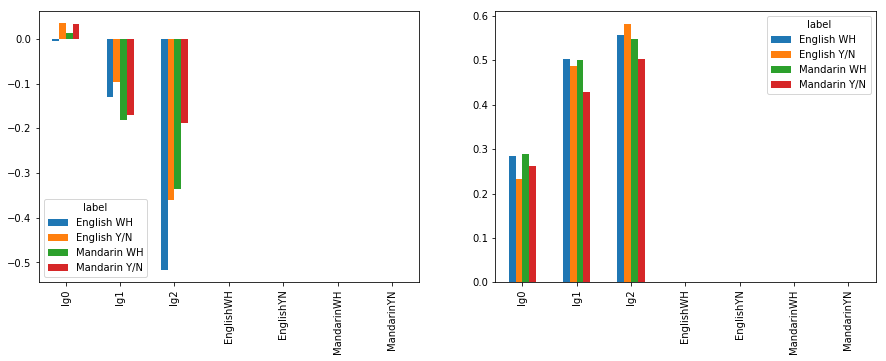

In [60]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
df_coeff.groupby('label').mean().T.plot.bar(ax=ax1)
df_coeff.groupby('label').std().T.plot.bar(ax=ax2)

C:\Users\Rachel\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\pandas\plotting\_core.py:2257: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


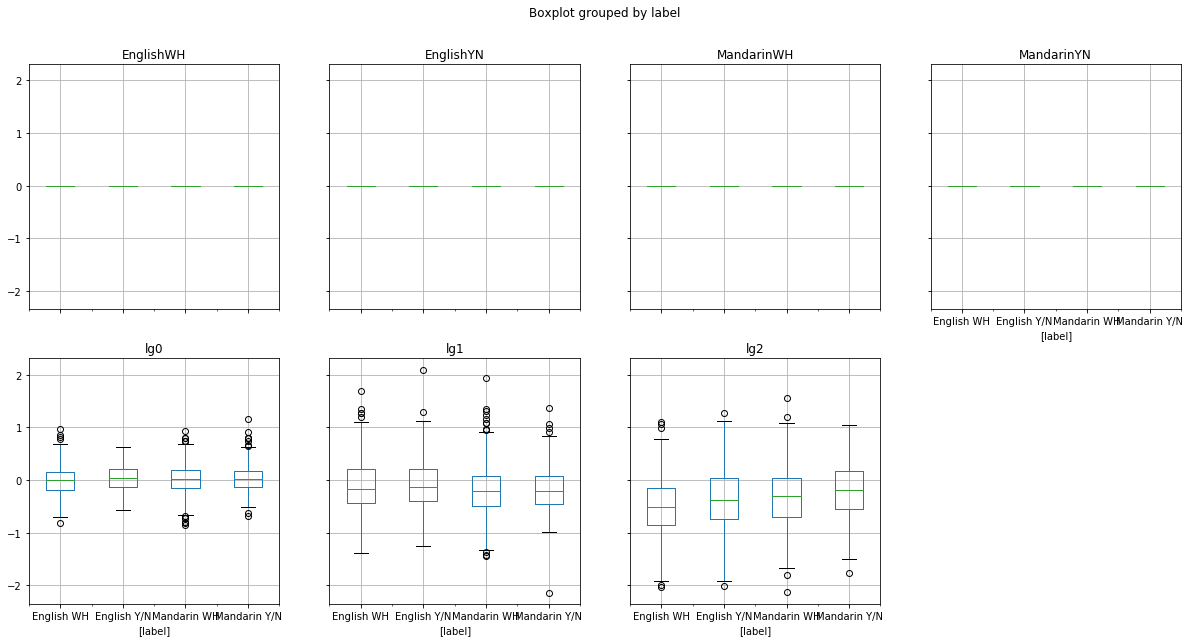

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
_ = df_coeff.boxplot(by = 'label', ax=ax, layout = (2,4))

In [62]:
import seaborn as sns

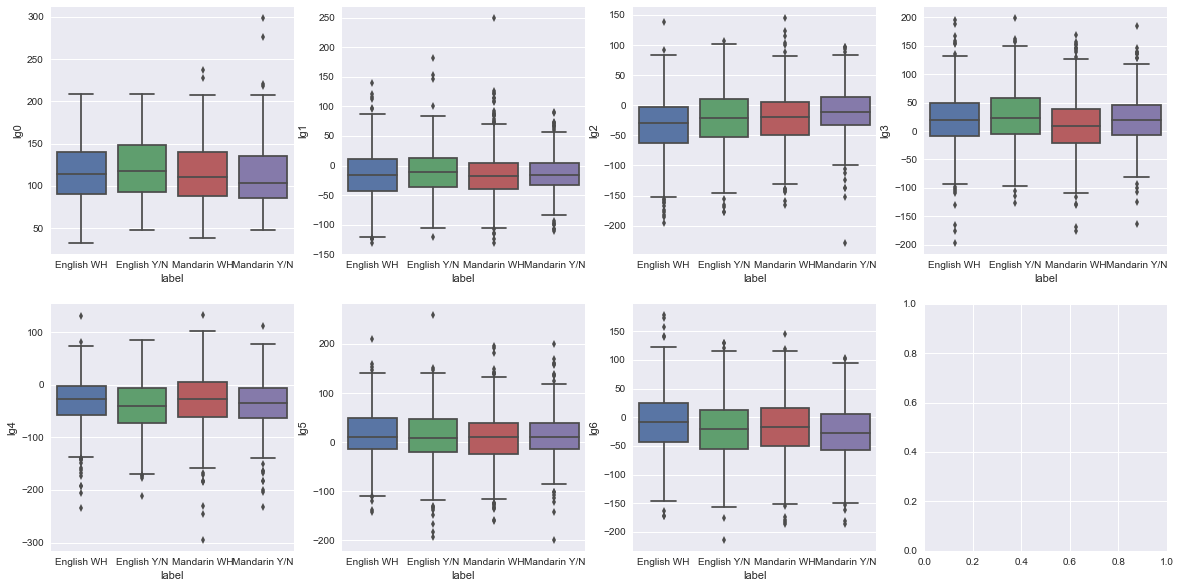

In [79]:
fig, ax= plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axlist = ax.flatten()
for i, l in enumerate(df_coeff.columns[0:7]):
    _ = sns.boxplot(x="label", y=l, data=df_coeff, ax=axlist[i])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000AE07ABF710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000AE07BE4128>], dtype=object)